# Installation and Setup

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preprocessing

In [2]:
from tensorflow.keras.datasets import mnist


In [3]:
#load dataset
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
x_train.min(), x_train.max()

(0, 255)

In [7]:
y_train.min(), y_train.max()

(0, 9)

In [8]:
#normalize the dataset
x_train = x_train/255.0
x_test = x_test/255.0

In [9]:
x_train.min(), x_train.max()

(0.0, 1.0)

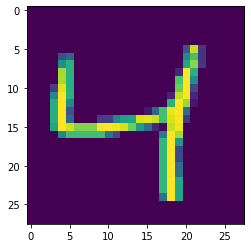

In [11]:
plt.imshow(x_train[2])

In [12]:
y_train[2]

4

# Building LSTM

In [13]:
#initializing RNN
model = tf.keras.models.Sequential()

In [14]:
#first LSTM layer
# return sequence=True since we are adding another LSTM layer after this
model.add(tf.keras.layers.LSTM(units=128,activation='relu',return_sequences=True, input_shape=(28,28)))

In [15]:
model.add(tf.keras.layers.Dropout(0.2))


In [16]:
#Second LSTM layer
model.add(tf.keras.layers.LSTM(units=128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

In [17]:
#first Dense layer
model.add(tf.keras.layers.Dense(units=32,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

In [18]:
#second Dense layer - Output
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 128)           80384     
_________________________________________________________________
dropout (Dropout)            (None, 28, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [20]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy", metrics=['sparse_categorical_accuracy'])

# Training the Model

In [21]:
history = model.fit(x_train,y_train, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 108s 57ms/step - loss: 1.2311 - sparse_categorical_accuracy: 0.5831 - val_loss: 0.1349 - val_sparse_categorical_accuracy: 0.9593
Epoch 2/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.1861 - sparse_categorical_accuracy: 0.9480 - val_loss: 0.0762 - val_sparse_categorical_accuracy: 0.9777
Epoch 3/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.1281 - sparse_categorical_accuracy: 0.9662 - val_loss: 0.0698 - val_sparse_categorical_accuracy: 0.9778
Epoch 4/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0954 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.0782 - val_sparse_categorical_accuracy: 0.9782
Epoch 5/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0801 - sparse_categorical_accuracy: 0.9781 - val_loss: 0.0591 - val_sparse_categorical_accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 105s 56ms/step - lo

In [23]:
#predictions
y_pred = model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [25]:
print (y_pred[10])
print (y_test[10])

0
0


In [28]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

acc_cm = accuracy_score(y_test,y_pred)
print('accuracy score is {}'.format(acc_cm))

[[ 973    0    0    0    0    0    5    1    1    0]
 [   0 1134    0    0    0    0    0    1    0    0]
 [   1    3 1024    0    0    0    0    3    1    0]
 [   0    0    7 1001    0    1    0    1    0    0]
 [   0    0    0    0  971    0    3    0    0    8]
 [   1    3    2   15    0  864    1    1    2    3]
 [   0    4    1    1    0    1  950    0    1    0]
 [   0    2    4    0    0    0    0 1021    0    1]
 [   2    1    4    3    2    1    1    3  954    3]
 [   0    4    0    1    8    1    0    8    0  987]]
accuracy score is 0.9879


# Learning Curve

In [26]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
  plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

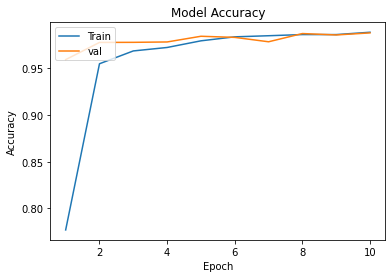

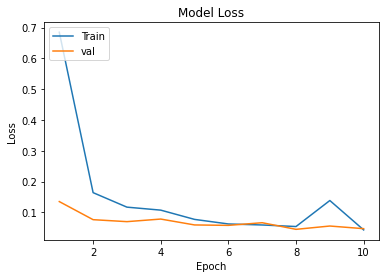

In [27]:
learning_curve(history, 10)